# Convolution of Piecewise continuous functions

In [29]:
import numpy as np
from numpy import logspace, linspace

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
%matplotlib inline

# plotting time period
NN = 10000

from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
ts = Symbol('t')

def nicegrid():
    plt.grid(True, which='major', color='#666666', linestyle='-')
    plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.minorticks_on()

## Define Convolution process

In [30]:
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('__pick_a_name__', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), (tau, lower_limit, upper_limit))

## Define the 2 functions w(t) and g(t)
### Both functions are rectangles - the width and heigtht can be changed here

In [31]:
# w = w_mag for w_l < t <= w_u
w_l = 0
w_u = 2
w_mag = 1
# g = g_mag for g_l < t <= g_u
g_l = 0
g_u = 3
g_mag = 1

### Given parameters, define the functions and convolve them

In [32]:
# define the functions
w = Piecewise((0, ts <= w_l),(w_mag, ts <= w_u),(0, True))
g = Piecewise((0, ts <= g_l),(g_mag, ts <= g_u),(0, True))
wg = convolve(w, g, ts)

### Plot the functions to see them

In [33]:
# plotting range of time
tt = np.linspace(w_l+g_l-1, w_u+g_u+1, NN)

# useful for plotting
lam_w = lambdify(ts, w, modules=['numpy'])
lam_g = lambdify(ts, g, modules=['numpy'])
# regular things doesn't work - try somethng new
lam_wg = lambdify(ts, wg, modules=['numpy'])
# convert for plotting (bit unclear why needed)
newwg = np.zeros((NN,1))
for ii in range(0,NN):
    newwg[ii] = lam_wg(tt[ii])

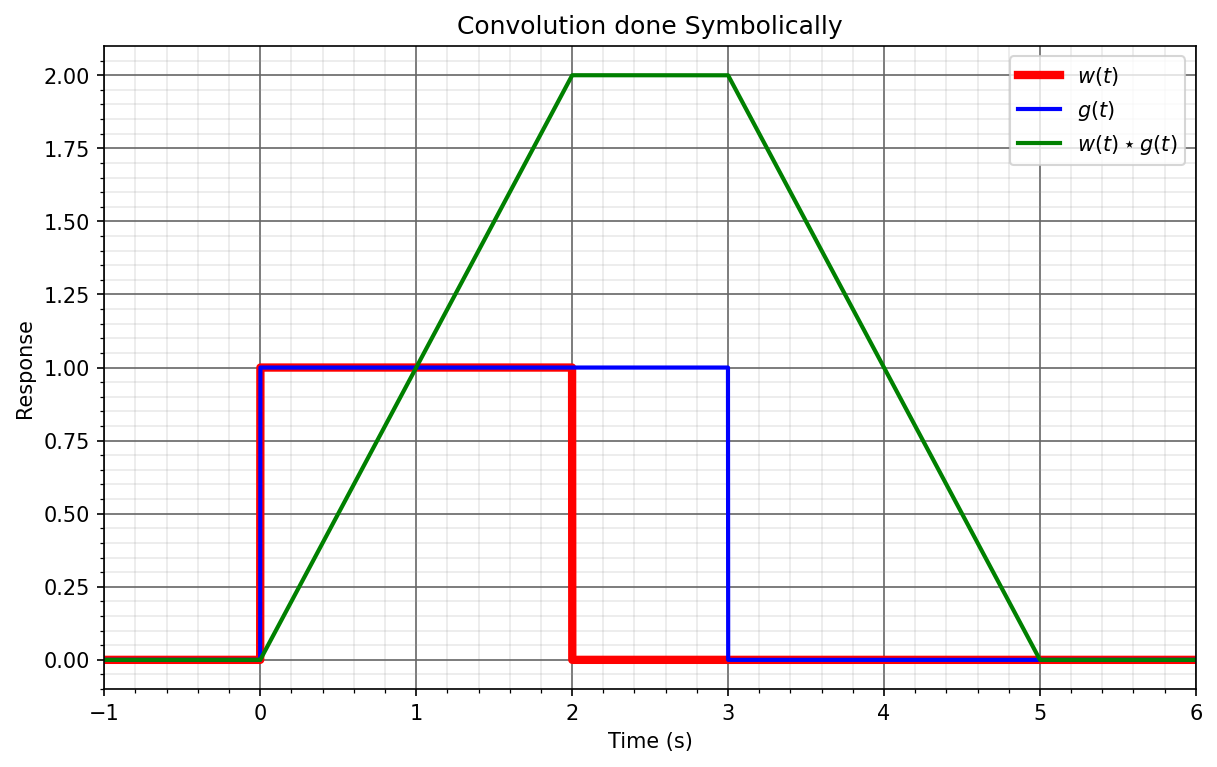

In [34]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_w(tt),'r-',linewidth=4,label='$w(t)$')
plt.plot(tt, lam_g(tt),'b-',linewidth=2,label='$g(t)$')
plt.plot(tt, newwg,'g',linewidth=2,label='$w(t) \star g(t)$')

nicegrid()
plt.legend()
plt.xlim(min(tt),max(tt))
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Convolution done Symbolically')
plt.show()

In [37]:
def f(w_l = -1, w_u = 2, w_mag = 1, g_l = 0, g_u = 2):
    # w = w_mag for w_l < t <= w_u
    # w_mag = 2
    # g = g_mag for g_l < t <= g_u
    g_mag = 1

    # plotting range of time
    lower = min(w_l+g_l,min(w_l,g_l))
    upper = max(w_u+g_u,max(w_u,g_u))
    tt = np.linspace(lower-1, upper+1, NN)

    # define the functions
    w = Piecewise((0, ts <= w_l),(w_mag, ts <= w_u),(0, True))
    g = Piecewise((0, ts <= g_l),(g_mag, ts <= g_u),(0, True))
    wg = convolve(w, g, ts)

    # useful for plotting
    lam_w = lambdify(ts, w, modules=['numpy'])
    lam_g = lambdify(ts, g, modules=['numpy'])
    # regular things doesn't work - try somethng new
    lam_wg = lambdify(ts, wg, modules=['numpy'])
    newwg = np.zeros((NN,1))
    for ii in range(0,NN):
        newwg[ii] = lam_wg(tt[ii])

    fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
    plt.plot(tt, lam_w(tt),'r-',linewidth=4,label='$w(t)$')
    plt.plot(tt, lam_g(tt),'b-',linewidth=2,label='$g(t)$')
    plt.plot(tt, newwg,'g',linewidth=2,label='$w(t) \star g(t)$')

    nicegrid()
    plt.legend()
    plt.xlim(min(tt),max(tt))
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.title('Convolution done Symbolically')
    plt.show()
    
    return

interactive_plot = interactive(f, {'manual': False}, w_l=(-1.0, 1.0,1), w_u=(2.0, 3.0,1), w_mag=(1.0, 5.0,1), g_l=(-1.0, 1.0,1), g_u=(2.0, 4.0,1))
output = interactive_plot.children[-1]
interactive_plot


interactive(children=(FloatSlider(value=-1.0, description='w_l', max=1.0, min=-1.0, step=1.0), FloatSlider(val…